In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/campus/campus.csv


In [15]:
#Loading the file
campus = pd.read_csv('/kaggle/input/campus/campus.csv')

#Renaming the columns
col = ['Timestamp','Current_year', 'Rln_status','Study_status ','cp', 'Hostel', 'gender','fav_sport', 'fav_hangout_place','state', 'dpt', 'fav_lang', 'fav_eatingplace','fav_club', 'satisfied', 'cpi' ]
campus.columns = col
#Dropping the timestamp column
campus= campus.drop('Timestamp', axis = 1)
campus.head()

,Current_year,Rln_status,Study_status,cp,Hostel,gender,fav_sport,fav_hangout_place,state,dpt,fav_lang,fav_eatingplace,fav_club,satisfied,cpi
0,2nd,In a relationship,Pulling of all nighters :),Yes,NaN,Man,Table tennis,IIT G lake (in front of library),Haryana,CSE,C++,Rolls Mania/Tacos,Octaves,No,9.86
1,3rd,Single,Studying on a regular basis,No,Manas,Man,Football,IIT G lake (in front of library),Uttar Pradesh,CST,Python,Hostel Canteen,ml.ai,No,1
2,2nd,Single,Studying on a regular basis,No,Disang,Woman,Badminton,IIT G lake (in front of library),West Bengal,ECE,C,Hostel Mess,Robotics,Maybe,9.3
3,2nd,Single,Pulling of all nighters :),No,NaN,Man,Football,IIT G lake (in front of library),The Government of NCT of Delhi,NaN,Python,Food Court,Coding Club,Maybe,7.5
4,NaN,Single,Studying on a regular basis,No,Lohit,Man,Cricket,IIT G lake (in front of library),Uttar Pradesh,NaN,Java,Hostel Canteen,ml.ai,Yes,8.83


# Cleaning the data

In [16]:
campus['Rln_status'] = campus['Rln_status'].replace({
    'In a relationship': 'mingle',
    "It's complicated": 'complicated'
})
campus['Study_status '] = campus['Study_status '].replace({
    "Pulling of all nighters :)" : 'all_nighter',
    "Studying on a regular basis": 'regular'
})
campus['fav_hangout_place'] = campus['fav_hangout_place'].replace({
    'IIT G lake (in front of library)': 'IITG_Lake',
    'Serpentine Lake 😏': 'serpentine;)',
    'Lake in front of the hospital': 'Tihor_lake'
    
})
campus['state'] = campus['state'].replace('The Government of NCT of Delhi', 'Delhi')
campus['fav_eatingplace'] = campus['fav_eatingplace'].replace('None', np.nan)
campus['fav_club'] = campus['fav_club'].replace('ml.ai', 'iitg.ai')
campus['Hostel'] = campus['Hostel'].replace('Bhramaputra', 'Brahmaputra')
campus.columns


Index(['Current_year', 'Rln_status', 'Study_status ', 'cp', 'Hostel', 'gender',
       'fav_sport', 'fav_hangout_place', 'state', 'dpt', 'fav_lang',
       'fav_eatingplace', 'fav_club', 'satisfied', 'cpi'],
      dtype='object')

*removing redundant values in fav sport*

In [17]:
replacements = {
    r'(?i)table\s*tennis\s*': 'table tennis',
    r'(?i)football\s*': 'football',
    r'(?i)badminton\s*': 'badminton',
    r'(?i)basketball\s*': 'basketball',
    r'(?i)cricket\s*': 'cricket',
    r'(?i)athleticss?\s*': 'athletics',
    r'(?i)swimming\s*': 'swimming',
    r'(?i)volleyball\s*': 'volleyball',
    r'(?i)chess\s*': 'chess',
    'to watch is cricketand basketball, to play is volleyball' : 'volleyball',
    'Sex' : np.nan,
    'none' : np.nan,
    'Nothing' : np.nan,
    'LT' : 'Lone tennis',
    'Athletic ' :'athletics',
    r'(?i)tt\s*' : 'table tennis',
    'Bro?': np.nan,
    'Tennis' : 'table tennis',
    'People Gazing' : np.nan,
    'Coding' : np.nan,
    'No sport lol' : np.nan,
    'badmintonlol' : 'badminton',
    'swimmingand badminton' : 'swimming,badminton',
    'futbol' : 'football',
    'Na' : np.nan,
    'Playing with my mental health' : np.nan,
    
}
campus['fav_sport'] = campus['fav_sport'].replace(replacements, regex=True)

print(campus['fav_sport'].unique())

['table tennis' 'football' 'badminton' 'cricket' 'basketball' 'chess'
 'athletics' nan 'swimming' 'volleyball' 'hockey'
 'to watch is cricketand basketball, to play is volleyball' 'Archery'
 'WWE ' 'Dodgeball' 'Handball' 'Barricade riding' 'GYMMING ' 'Lone tennis'
 'Figure Skating ' 'table tennis ' 'cricket,badminton' 'Running' 'Kabaddi'
 'Bike riding' 'cricket, football, swimming, table tennis.' 'badmintonlol'
 'swimmingand badminton' 'cricket,volleyball' 'Bat-Ball' 'Gymnastics '
 'Genshin Impact' 'Squash' 'Drone racing ']


*Converting the non float values in cpi to float*

In [18]:
import warnings
warnings.filterwarnings('ignore')

def isfloat(x):
    try:
        float(x)
        return True
    except:
        return False
    
for i in campus.index:
    if isfloat(campus.loc[i, 'cpi']):
        campus.loc[i, 'cpi'] = float(campus.loc[i, 'cpi'])
    else:
        campus.loc[i, 'cpi'] = np.nan
        
        # Values of cpi outside range 4-10 is considered fake
    if (campus.loc[i, 'cpi'] >= 10) | (campus.loc[i, 'cpi'] <= 4):
        campus.loc[i, 'cpi'] = np.nan
        
campus['cpi'].fillna(campus['cpi'].mean(), inplace=True)


campus.cpi


0      9.860000
1      8.129587
2      9.300000
3      7.500000
4      8.830000
         ...   
222    8.660000
223    9.340000
224    6.870000
225    8.400000
226    8.500000
Name: cpi, Length: 227, dtype: float64

# How the way of studying(all nighter or regular) affects the cpi

> *Inference*->
**The density of all nighters having cpi around 8 is more. 
The graph is almost same for all nighters and regular students actually so it means It will be the samee weather u study 1 day b4 exam or study regularly YEEEEEE!!!! :) 
Some people who study regularly have low cpi as well(3-4). 
9+ cpi is more from regular students**

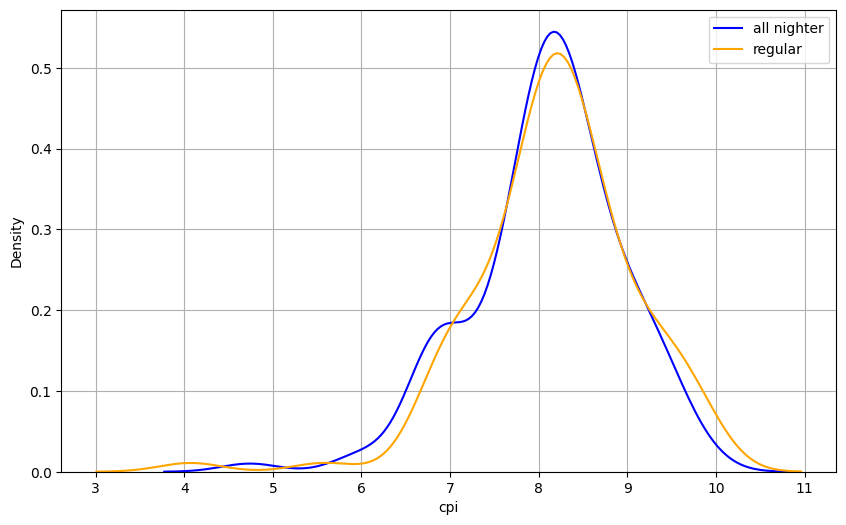

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
#kde plot is used for continuous density comparisn distribution and no binning issues
plt.figure(figsize=(10,6))
plt.style.use('default')
sns.kdeplot(campus[campus['Study_status '] == 'all_nighter']['cpi'], color='blue', label ='all nighter' )
sns.kdeplot(campus[campus['Study_status '] == 'regular' ]['cpi'], color='orange' , label = 'regular')
plt.grid(True)
plt.legend()

plt.show()

# How does way of study vary year by year 
**Inference->**
As we can see that majority people do one nighter study. In third year 50% of ppl do regular studies and 50% all nighters

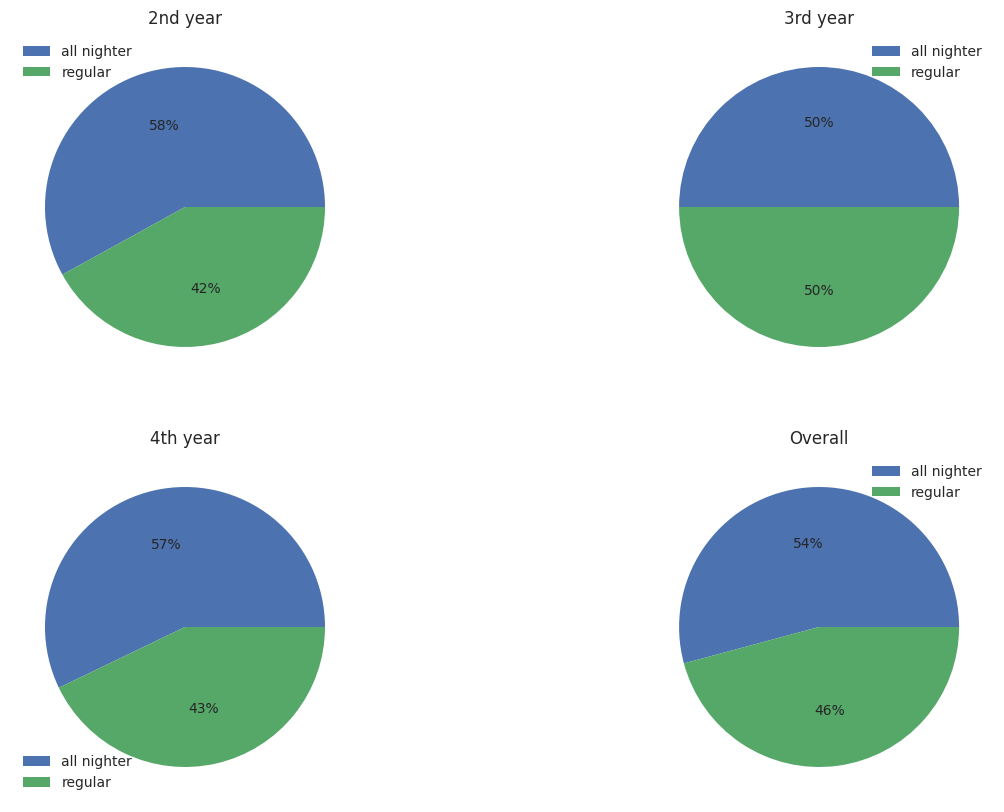

In [21]:
plt.figure(figsize=(15,10))
plt.style.use( 'seaborn')
plt.subplot(2,2,1)
plt.title('2nd year')
plt.pie(campus[campus['Current_year'] == '2nd']['Study_status '].value_counts(), autopct='%.0f%%')
plt.legend(labels=['all nighter', 'regular'])

plt.subplot(2,2,2)
plt.title('3rd year')
plt.pie(campus[campus['Current_year'] == '3rd']['Study_status '].value_counts(), autopct='%.0f%%')
plt.legend(labels=['all nighter', 'regular'])

plt.subplot(2,2,3)
plt.title('4th year')
plt.pie(campus[campus['Current_year'] == '4th']['Study_status '].value_counts(), autopct='%.0f%%')
plt.legend(labels=['all nighter', 'regular'])

plt.subplot(2,2,4)
plt.title('Overall')
plt.pie(campus['Study_status '].value_counts(), autopct='%.0f%%')
plt.legend(labels=['all nighter', 'regular'])

plt.show()

# Does CPI affect the satisfaction level of the IITians?
**Inference ->**
As we can see from the count plot that the satisfaction level  increases as we go from cpi = 5 to cpi = 9 but after that satisfaction decreases
*the same happens with the people who are not satisfied *
*Most of the people are satisfied*
*Satisfied/unsatisfied ratio is greatest in cpi = (8,9]*

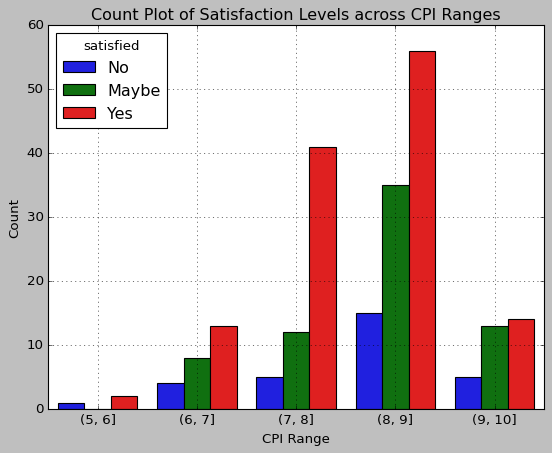

In [22]:
plt.style.use('classic')
campus['CPI_bins'] = pd.cut(campus['cpi'], bins=[5,6, 7, 8, 9, 10])
sns.countplot(x='CPI_bins', hue='satisfied', data=campus)
plt.xlabel('CPI Range')
plt.grid(True)
plt.ylabel('Count')
plt.title('Count Plot of Satisfaction Levels across CPI Ranges')
plt.show()

# How gender is related to the relationship status 
**Inference ->**
**As we can see that there are more man in relationship than woman. 
More woman are single and almost equal percent of them find rln complicated **

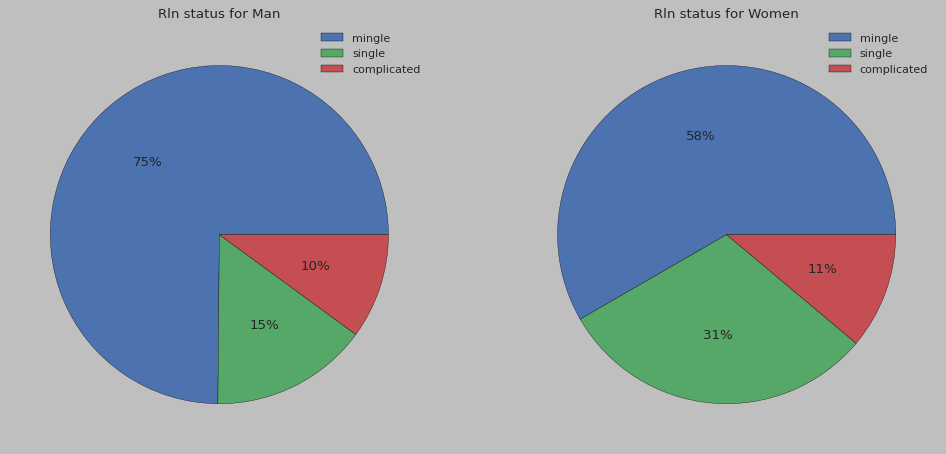

In [23]:
plt.figure(figsize=(15,15))
plt.style.use('seaborn')
plt.subplot(2,2,1)
plt.title('Rln status for Man')
plt.pie(campus[campus['gender'] == 'Man']['Rln_status'].value_counts(), autopct='%1.0f%%')
plt.legend(labels=['mingle', 'single', 'complicated'])

plt.subplot(2,2,2)
plt.title('Rln status for Women')
plt.pie(campus[campus['gender'] == 'Woman']['Rln_status'].value_counts(), autopct='%1.0f%%')
plt.legend(labels=['mingle', 'single', 'complicated'])
plt.show()

# If a person does cp then how will it affect their fav coding language
**Inference ->**
**As we can see that the person doing cp prefers c++ over anything and there are a significant no. of python users as well **

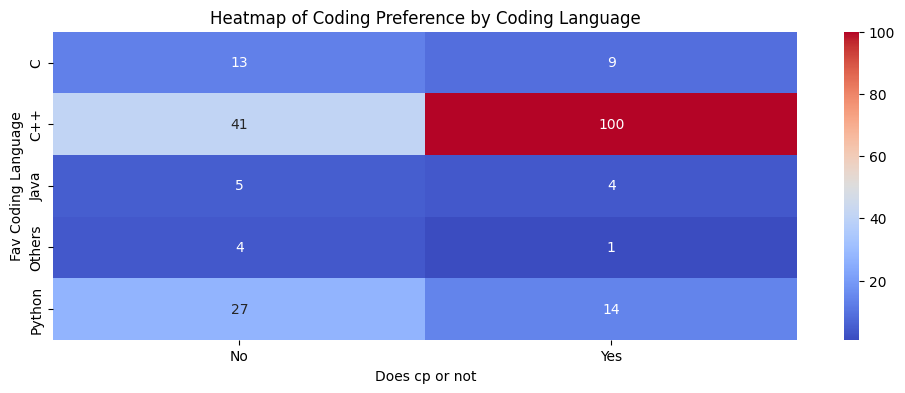

In [24]:
plt.style.use('default')
x = pd.crosstab(campus['fav_lang'], campus['cp'])
plt.figure(figsize=(12, 4))
sns.heatmap(x, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Does cp or not')
plt.ylabel('Fav Coding Language')
plt.title('Heatmap of Coding Preference by Coding Language')
plt.show()

In [ ]:
plt.style.available

# Which club people have the highest avg cpi
**Inference ->**
**Anchoring club has it;
least is from palates and finearts**

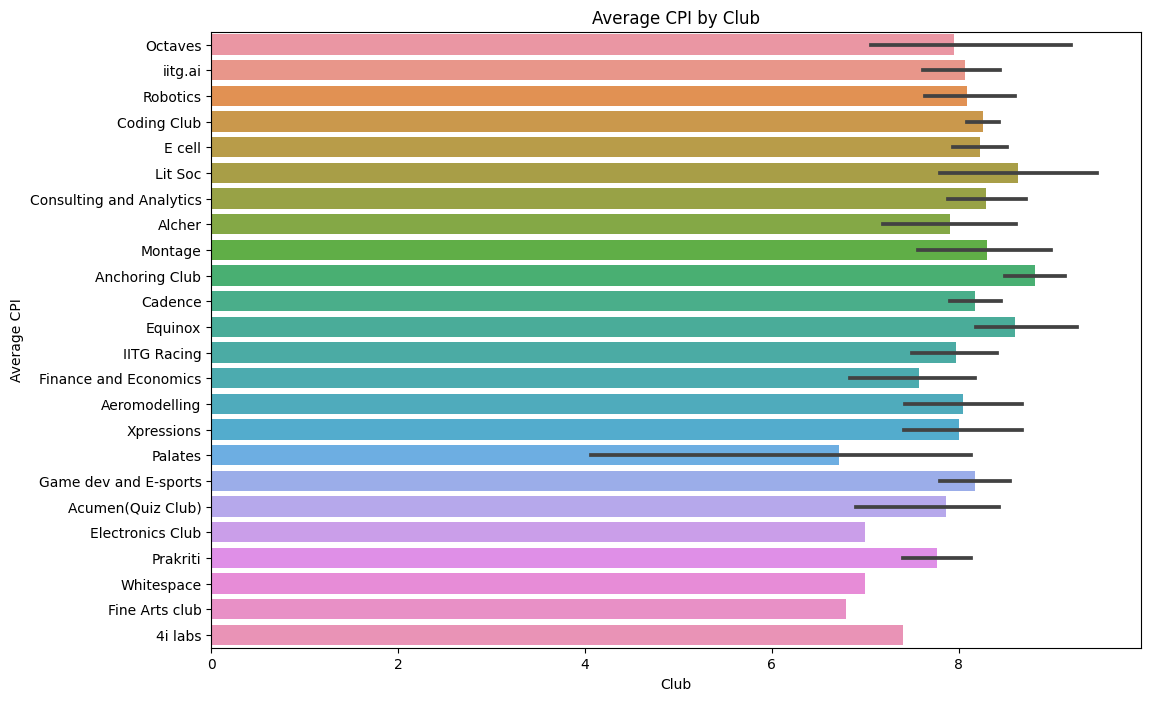

In [25]:
plt.figure(figsize=(12, 8))
sns.barplot(y='fav_club', x='cpi', data=campus, estimator=lambda x: sum(x) / len(x))
plt.xlabel('Club')
plt.ylabel('Average CPI')
plt.title('Average CPI by Club')

plt.show()

# What are the fav places of students in campus
**Inference ->**
*As we can see that IITG lake has the max no. of likings and after that food court*

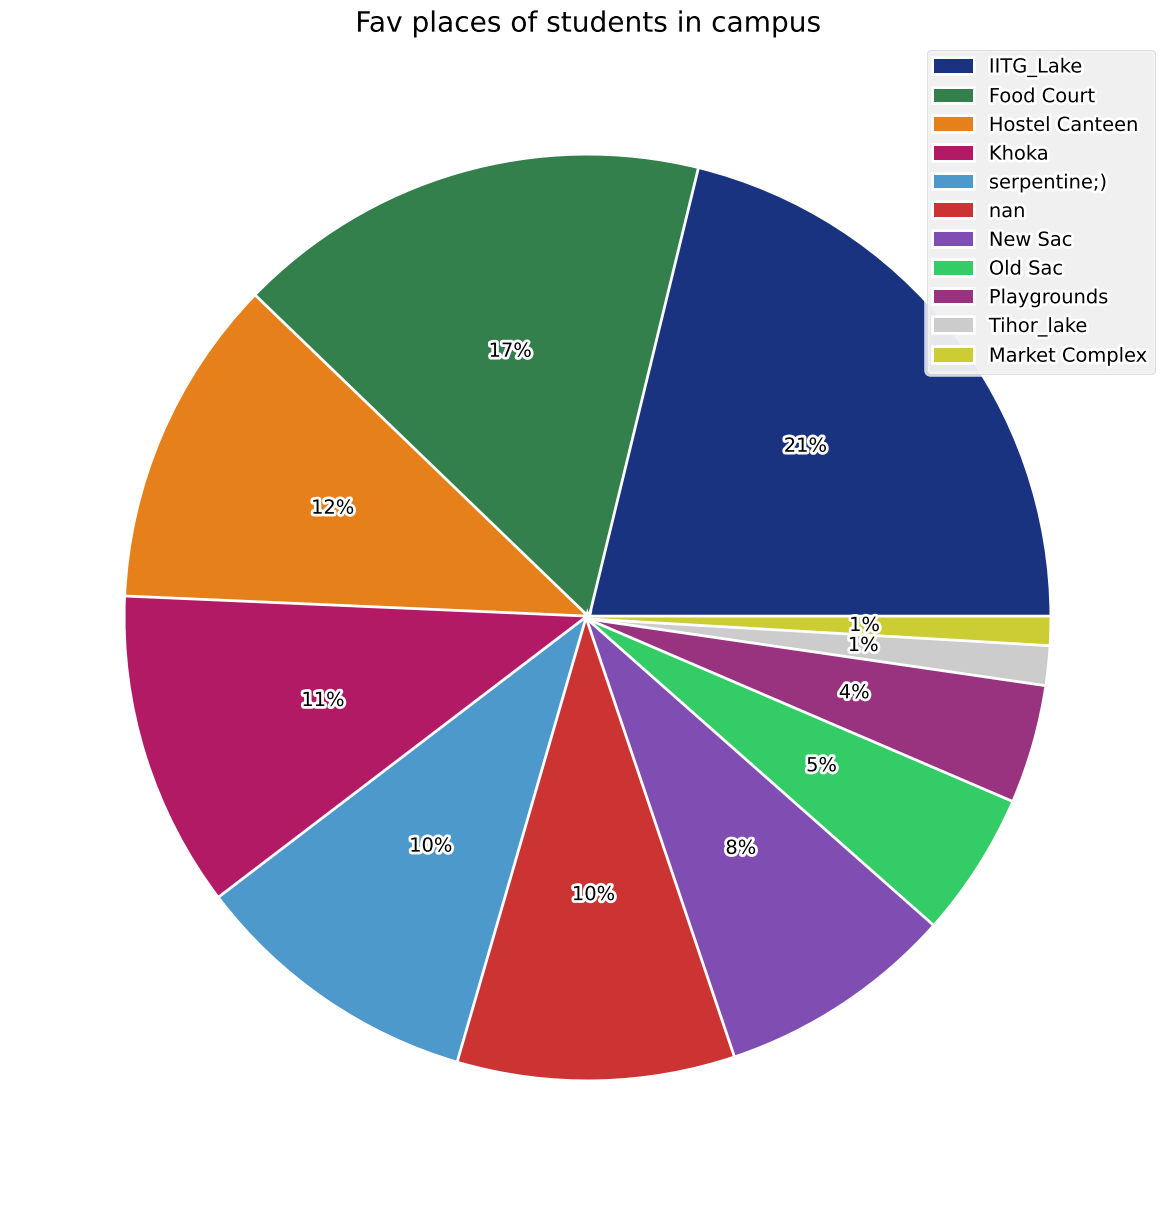

In [26]:
plt.figure(figsize = (15,15))
plt.style.use('fivethirtyeight')
plt.xkcd(False)
colors = colors = [
    (0.1, 0.2, 0.5),   # Dark blue
    (0.2, 0.5, 0.3),   # Greenish
    (0.9, 0.5, 0.1),   # Orange
    (0.7, 0.1, 0.4),   # Purplish
    (0.3, 0.6, 0.8),   # Light blue
    (0.8, 0.2, 0.2),   # Reddish
    (0.5, 0.3, 0.7),   # Violet
    (0.2, 0.8, 0.4),   # Bluish green
    (0.6, 0.2, 0.5),   # Dark magenta
    (0.8, 0.8, 0.8),   # Light gray
    (0.8, 0.8, 0.2),   # Yellow  
]
plt.pie(campus['fav_hangout_place'].value_counts(),colors = colors, autopct='%1.0f%%')
plt.legend(labels=['IITG_Lake', 'Food Court', 'Hostel Canteen', 'Khoka', 'serpentine;)',np.nan, 'New Sac', 'Old Sac', 'Playgrounds','Tihor_lake', 'Market Complex', 'Others'])
plt.title('Fav places of students in campus')
plt.show()